## USING LOGIC ON ELA IMAGES

In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [3]:
def create_ela(img):
    """ This creates a new image that contains the ELA of an image by saving it as jpg with different quality and
    then retrieve a weighted absolute differentce between the original and saved image
    Keyword arguments:img -- image to be analyzed for Error Level Analysis
    """
    scale = 15
    img_orig = img.astype(np.uint8)
    cv2.imwrite("temp.jpg", img_orig, [cv2.IMWRITE_JPEG_QUALITY, 90])
    img_90 = cv2.imread("temp.jpg")
    diff = scale * cv2.absdiff(img_orig, img_90)
    return diff


def convert_files(old_dir_path, new_dir_path):
    if not os.path.isdir(old_dir_path):
        print("is not directory. sad!")
        return
    dir = os.fsdecode(old_dir_path)
    for file in os.listdir(dir):
        try:
            src = cv2.imread(os.path.join(dir, file))
            new_file = create_ela(src)
            dst = os.path.join(new_dir_path, file)
            cv2.imwrite(dst, new_file)
        except:
            print(file)
            continue

In [5]:
#img_file = "./data/archive/train/1/0022 (4).jpg"
#img1 = cv2.imread(img_file)
#ela_img = create_ela(img1)
#cv2.imwrite("./final/sample_data/ELA_0022 (4).jpg", ela_img)

In [17]:
#cv2.imshow("Original Image", img1)
#key = cv2.waitKey(5000)
#cv2.imshow("ELA 90 Image", ela_img)
#key = cv2.waitKey(5000)

2025-04-05 18:20:19.700 python[1398:23707] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-05 18:20:19.700 python[1398:23707] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [8]:
#Test with one image - error closing the windows
#img_file = "./data/archive/train/0/1000 (4).jpg"
#img1 = cv2.imread(img_file)
#cv2.imshow("Original Image", img1)
#key = cv2.waitKey(5000)
#diff1 = create_ela(img1)
#cv2.imshow("ela90", diff1)
#key = cv2.waitKey(2000)
#if key == 27: #if ESC is pressed, exit
#    cv2.destroyAllWindows()

In [6]:
#convert files into ELA
#convert_files("data/archive/train/0", "data/archive2/train/0")
#convert_files("data/archive/train/1", "data/archive2/train/1")
#convert_files("data/archive/test/0", "data/archive2/test/0")
#convert_files("data/archive/test/1", "data/archive2/test/1")

.DS_Store
.DS_Store


In [19]:
#Look at 1 sample
img_pixels = cv2.imread("data/archive/test/1/0000.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)
pix_median = np.median(img_pixels)
print(pix_median)
bright_pixels = img_pixels >= pix_median
num_bright_pixels = np.sum(bright_pixels)
print(num_bright_pixels)

(32, 32)
174.0
519


In [23]:
#ORIGINAL IMAGE - REAL
file_list = glob.glob("data/archive/test/1/*.jpg")
visible_pixels_ORIG = []
for file in file_list:
    img_pixels = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    pix_median = np.median(img_pixels)
    bright_pixels = img >= pix_median
    num_bright_pixels = np.sum(bright_pixels)
    visible_pixels_ORIG.append(num_bright_pixels)

#ORIGINAL IMAGE - FAKE
file_list = glob.glob("data/archive/test/0/*.jpg")
visible_pixels_ORIG_fake = []
for file in file_list:
    img_pixels = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    pix_median = np.median(img_pixels)
    bright_pixels = img >= pix_median
    num_bright_pixels = np.sum(bright_pixels)
    visible_pixels_ORIG_fake.append(num_bright_pixels)

In [37]:
#ELA IMAGE - REAL
file_list = glob.glob("data/archive2/test/1/*.jpg")
visible_pixels_ELA_real = []
for file in file_list:
    img_pixels = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    pix_median = np.median(img_pixels)
    #print(pix_median)
    bright_pixels = img_pixels >= pix_median
    num_bright_pixels = np.sum(bright_pixels)
    visible_pixels_ELA_real.append(num_bright_pixels)

In [41]:
#ELA IMAGE - FAKE
file_list = glob.glob("data/archive2/test/0/*.jpg")
visible_pixels_ELA_fake = []
for file in file_list:
    img_pixels = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    pix_median = np.median(img_pixels)
    bright_pixels = img_pixels >= pix_median
    num_bright_pixels = np.sum(bright_pixels)
    visible_pixels_ELA_fake.append(num_bright_pixels)

In [71]:
np.concatenate([visible_pixels_ELA_fake, visible_pixels_ELA_real])

array([531, 522, 560, ..., 523, 560, 530])

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

train_X = np.concatenate([visible_pixels_ELA_fake[:15000], visible_pixels_ELA_real[:15000]]).reshape(-1, 1) 
train_y = np.concatenate([np.zeros(15000), np.ones(15000)])
test_X = np.concatenate([visible_pixels_ELA_fake[15000:], visible_pixels_ELA_real[15000:]]).reshape(-1, 1) 
test_y = np.concatenate([np.zeros(5000), np.ones(5000)])


# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(train_X, train_y)

# Predict class labels for new data
y_pred = model.predict(test_X)
print("Predictions:", y_pred)

# Evaluate the model (optional, if you have a test set)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse}")

# Evaluate the model (optional, if you have a test set)
r_squared = model.score(test_X, test_y)
print(f"Accuracy R-squared: {r_squared}")

Predictions: [1. 0. 0. ... 0. 1. 0.]
Mean Squared Error: 0.4625
Accuracy R-squared: 0.5375


In [111]:
np.set_printoptions(threshold=np.inf)

In [113]:
print(test_X)

[[ 536]
 [ 513]
 [ 518]
 [ 538]
 [ 512]
 [ 520]
 [ 566]
 [ 514]
 [ 512]
 [ 542]
 [ 525]
 [ 531]
 [ 526]
 [ 550]
 [ 526]
 [ 518]
 [ 538]
 [ 537]
 [ 544]
 [ 518]
 [ 538]
 [ 564]
 [ 537]
 [ 529]
 [ 524]
 [ 531]
 [ 539]
 [ 514]
 [ 521]
 [ 525]
 [ 551]
 [ 553]
 [ 525]
 [ 532]
 [ 573]
 [ 526]
 [ 543]
 [ 514]
 [ 516]
 [ 532]
 [ 523]
 [ 551]
 [ 530]
 [ 529]
 [ 524]
 [ 512]
 [ 518]
 [ 568]
 [ 562]
 [ 516]
 [ 525]
 [ 557]
 [ 538]
 [ 548]
 [ 534]
 [ 574]
 [ 538]
 [ 529]
 [ 532]
 [ 531]
 [ 517]
 [ 522]
 [ 532]
 [ 532]
 [ 514]
 [ 527]
 [ 525]
 [ 549]
 [ 519]
 [ 526]
 [ 526]
 [ 533]
 [ 536]
 [ 516]
 [ 546]
 [ 548]
 [ 524]
 [ 563]
 [ 529]
 [ 577]
 [ 568]
 [ 549]
 [ 531]
 [ 513]
 [ 530]
 [ 519]
 [ 532]
 [ 537]
 [ 514]
 [ 548]
 [ 517]
 [ 525]
 [ 531]
 [ 524]
 [ 527]
 [ 512]
 [ 513]
 [ 524]
 [ 527]
 [ 545]
 [ 519]
 [ 541]
 [ 518]
 [ 514]
 [ 537]
 [ 515]
 [ 517]
 [ 516]
 [ 538]
 [ 529]
 [ 520]
 [ 526]
 [ 540]
 [ 512]
 [ 527]
 [ 535]
 [ 533]
 [ 517]
 [ 538]
 [ 565]
 [ 553]
 [ 527]
 [ 535]
 [ 534]
 [ 520]


In [115]:
test_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [117]:
y_pred

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0.

In [121]:
len(test_X), len(y_pred), len(test_y)

(10000, 10000, 10000)

In [ ]:
## OLD CODE BELOW

In [21]:
#ELA - REAL
threshold = 100
file_list = glob.glob("data/archive2/test/1/*.jpg")
pixels2 = []
for file in file_list:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    bright_pixels = img >= threshold
    num_bright_pixels = np.sum(bright_pixels)
    pixels2.append(num_bright_pixels)

max(pixels2)

161

In [23]:
pixels2

[6,
 0,
 4,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 2,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 23,
 1,
 0,
 0,
 5,
 0,
 2,
 0,
 0,
 14,
 11,
 0,
 12,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 26,
 0,
 0,
 2,
 1,
 21,
 1,
 0,
 0,
 1,
 15,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 11,
 9,
 0,
 2,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 4,
 3,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 10,
 0,
 0,
 1,
 17,
 4,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 4,
 3,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 5,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 9,
 1,
 1,
 0,
 0,
 2,
 5,
 0,
 2,
 2,
 0,
 0,
 3,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 8,
 0,
 1,
 0,
 1,
 0,
 2,
 0,

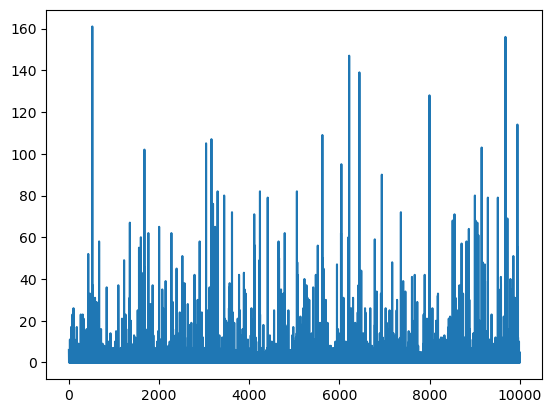

In [25]:
plt.plot(pixels2)

In [3]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score, accuracy_score
import cv2
import numpy as np
import os, shutil

from collections import defaultdict

import torch.nn.functional as F

In [4]:
# Define CNN architecture classes
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256) #old, replaced below
        #self.fc1 = nn.Linear(64 * 4 * 4, 128) 
        self.prelu = nn.PReLU() 
        #self.fc2 = nn.Linear(256, 10)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.prelu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

In [5]:
#pytorch configs
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 25 #25 #how many of training cycles to run?
batch_size = 1000 #how many records at one time?
learning_rate = 0.001 #0.0001 how fast can you learn? size of the learning step? 0.01 was the best last time
iter_save = 10 #25

# lambda function
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    #transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [6]:
# Functions

#Training the model
def train_model(model, train_loader):
    global loader_map
    results = { loader_name: defaultdict(list) for loader_name in loader_map }
    
    model.train()
    
    running_loss = 0.0
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            #labels are the actual values of the images
            images, labels = images.to(device), labels.to(device)
            # Forward pass
            #outputs are the logits of the predicted values of the images 
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if (i+1)%iter_save == 0:
                #train_f1, train_acc, train_loss = test_model(model, train_loader)
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/iter_save:.4f}")
                running_loss = 0.0

                for loader_name in loader_map:
                    f1, acc, loss = test_model(model, loader_map[loader_name])
                    results[loader_name]['f1'].append(f1)
                    results[loader_name]['acc'].append(acc)
                    results[loader_name]['loss'].append(loss)
                    
    #print(results)
    return results

# Testing the model
def test_model(model, data_loader):
    pred = []
    act = []
    running_loss = 0.0
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader: 
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, pred_class = torch.max(outputs.data, 1)
            
            pred.append(pred_class)
            act.append(labels)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)

        pred = np.concatenate(pred)
        act = np.concatenate(act)
        # f1 scores
        f1 = f1_score(act, pred, average='weighted')
        # accuracies
        acc = accuracy_score(act, pred, normalize=True)
        # loss
        loss = running_loss/len(data_loader.dataset)
            
    return f1, acc, loss

#plot performance of the models against all datasets in the global data loader map
def plotPerformance(metric, lr, iter):
    loader_name_list = []
    max_len = max([len(results[loader][metric]) for loader in results])
    x_list = np.arange(iter, iter*(max_len+1), iter)
    for loader in results:
        y_list = results[loader][metric]
        loader_name_list.append(loader)
        plt.plot(x_list, y_list)
    plt.legend(loader_name_list, loc="lower right", bbox_to_anchor=(1.0, 1.05))
    plt.xlabel('iterations')
    plt.ylabel(f'{metric} scores')
    plt.xticks(x_list, rotation=90)
    plt.title(f'{metric} vs iterations for learning rate {lr}')
    plt.show() 


def save_model(model, rel_file_path):
    #example: "model/CIFAR_real_deepNN.pth")
    torch.save(model, rel_file_path)

def get_model(rel_file_path):
   #Load the saved model
    model = torch.load(rel_file_path, weights_only=False)
    model.eval()
    return model

#move files into directories with labels (used for CIFAKE)
def moveFiles(dir_path):
    #Call syntax: moveFiles("data/archive/train/FAKE/")
    dir = os.fsdecode(dir_path)
    if not os.path.isdir(dir_path):
        print("is not directory. sad!")
        return

    #creating new number directories
    for i in range(1, 11):
        dst = os.path.join(dir_path, str(i))
        os.mkdir(dst)
        
    #for labels 2 to 10
    for file in os.listdir(dir):
        file_src = os.fsdecode(file)
        for i in range(2, 11):
            if file_src.endswith(f"({i}).jpg"):
                src = os.path.join(dir_path, file_src)
                dst = os.path.join(dir_path, str(i))
                shutil.move(src, dst)
                
    #for label 1
    for file in os.listdir(dir):
        file_src = os.fsdecode(file)
        if file_src.endswith(".jpg"):
            src = os.path.join(dir_path, file_src)
            dst = os.path.join(dir_path, "1")
            shutil.move(src, dst)

def create_ela(img):
    """ This creates a new image that contains the ELA of an image by saving it as jpg with different quality and
    then retrieve a weighted absolute differentce between the original and saved image
    Keyword arguments:img -- image to be analyzed for Error Level Analysis
    """
    scale = 15
    img_orig = cv2.imread(img)
    #img = img.astype(np.uint8)
    cv2.imwrite("temp.jpg", img_orig, [cv2.IMWRITE_JPEG_QUALITY, 90])
    img_90 = cv2.imread("temp.jpg")
    diff = scale * cv2.absdiff(img_orig, img_90)

    #cv2.imwrite("temp.jpg", img_95, [cv2.IMWRITE_JPEG_QUALITY, 90])
    #img_98 = cv2.imread("temp.jpg")
    #diff = cv2.absdiff(img, img2)
    return diff

    

def convert_files(old_dir_path, new_dir_path):
    if not os.path.isdir(old_dir_path):
        print("is not directory. sad!")
        return
    
    #convert files
    dir = os.fsdecode(old_dir_path)
    for file in os.listdir(dir):
        try:
            src = cv2.imread(os.path.join(dir, file))
            new_file = create_ela(src)
            dst = os.path.join(new_dir_path, file)
            cv2.imwrite(dst, new_file)
        except:
            print(file)
            continue
        

def addLoader(loader_name, dir, format):
    global loader_map
    is_train = "train" in loader_name
    if format == "CIFAKE":
        dataset = torchvision.datasets.ImageFolder(root=dir, transform=transform)
        loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=is_train)
        moveFiles(dir)
        
    elif format == "CIFAR":
        dataset = torchvision.datasets.CIFAR10(root=dir, train=is_train, download=True, transform=transform)
        loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=is_train)
        
    loader_map[loader_name] = loader

In [7]:
##data loads - TRY THIS NEXT TIME INSTEAD OF NEXT CELL - DOES NOT WORK, NEED TO DEBUG
#loadermap = {}
##addLoader(train_loader, './data', "CIFAR")
##addLoader(test_loader, './data', "CIFAR")
##addLoader(fake_train_loader, './data/archive/train/FAKE', "CIFAKE")
##addLoader(fake_test_loader, './data/archive/test/FAKE', "CIFAKE")
#addLoader("real_train_loader", './data/archive/train/REAL', "CIFAKE")
#addLoader("real_test_loader", './data/archive/test/REAL', "CIFAKE")

In [8]:
#data loads
#train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
#fk_test_dataset = torchvision.datasets.ImageFolder(root='./data/archive/test/FAKE', transform=transform)
#fk_train_dataset = torchvision.datasets.ImageFolder(root='./data/archive/train/FAKE', transform=transform)
#rl_train_dataset = torchvision.datasets.ImageFolder(root='./data/archive/train/REAL', transform=transform)
#rl_test_dataset = torchvision.datasets.ImageFolder(root='./data/archive/test/REAL', transform=transform)
bnry_train_dataset = torchvision.datasets.ImageFolder(root='./data/archive/train', transform=transform)
bnry_test_dataset = torchvision.datasets.ImageFolder(root='./data/archive/test', transform=transform)

#train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
#fake_test_loader = torch.utils.data.DataLoader(dataset=fk_test_dataset, batch_size=batch_size, shuffle=True)
#fake_train_loader = torch.utils.data.DataLoader(dataset=fk_train_dataset, batch_size=batch_size, shuffle=True)
#real_train_loader = torch.utils.data.DataLoader(dataset=rl_train_dataset, batch_size=batch_size, shuffle=True)
#real_test_loader = torch.utils.data.DataLoader(dataset=rl_test_dataset, batch_size=batch_size, shuffle=True)
bnry_train_loader = torch.utils.data.DataLoader(dataset=bnry_train_dataset, batch_size=batch_size, shuffle=True)
bnry_test_loader = torch.utils.data.DataLoader(dataset=bnry_test_dataset, batch_size=batch_size, shuffle=True)

# define global map of loader_name to data loaders
loader_map = {
    #"CIFAR_test": test_loader,
    #"CIFAR_train": train_loader,
    #"CIFAKE_fake_test": fake_test_loader,
    #"CIFAKE_fake_train": fake_train_loader,
    #"CIFAKE_real_test": real_test_loader,
    #"CIFAKE_real_train": real_train_loader,
    "BNRY_test": bnry_test_loader,
    "BNRY_train": bnry_train_loader
}

In [41]:
#How many records in train folder?
bnry_train_loader.dataset, \
bnry_train_loader.dataset.classes, \
bnry_train_loader.dataset.targets.count(0), \
bnry_train_loader.dataset.targets.count(1)

(Dataset ImageFolder
     Number of datapoints: 100000
     Root location: ./data/archive/train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 ['0', '1'],
 50000,
 50000)

In [43]:
#How many records in test folder
bnry_test_loader.dataset, \
bnry_test_loader.dataset.classes, \
bnry_test_loader.dataset.targets.count(0), \
bnry_test_loader.dataset.targets.count(1)

(Dataset ImageFolder
     Number of datapoints: 20000
     Root location: ./data/archive/test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 ['0', '1'],
 10000,
 10000)

In [261]:
# Select the model
#model = SimpleCNN().to(device)
model = DeepCNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

results = train_model(model, bnry_train_loader)

Epoch [1/25], Step [25/100], Loss: 0.6226
Epoch [1/25], Step [50/100], Loss: 0.5259
Epoch [1/25], Step [75/100], Loss: 0.4741
Epoch [1/25], Step [100/100], Loss: 0.4527
Epoch [2/25], Step [25/100], Loss: 0.4364
Epoch [2/25], Step [50/100], Loss: 0.4384
Epoch [2/25], Step [75/100], Loss: 0.4320
Epoch [2/25], Step [100/100], Loss: 0.4163
Epoch [3/25], Step [25/100], Loss: 0.4138
Epoch [3/25], Step [50/100], Loss: 0.4139
Epoch [3/25], Step [75/100], Loss: 0.4075
Epoch [3/25], Step [100/100], Loss: 0.4015
Epoch [4/25], Step [25/100], Loss: 0.4078
Epoch [4/25], Step [50/100], Loss: 0.4048
Epoch [4/25], Step [75/100], Loss: 0.3967
Epoch [4/25], Step [100/100], Loss: 0.3978
Epoch [5/25], Step [25/100], Loss: 0.3921
Epoch [5/25], Step [50/100], Loss: 0.3928
Epoch [5/25], Step [75/100], Loss: 0.3876
Epoch [5/25], Step [100/100], Loss: 0.3915
Epoch [6/25], Step [25/100], Loss: 0.3904
Epoch [6/25], Step [50/100], Loss: 0.3871
Epoch [6/25], Step [75/100], Loss: 0.3899
Epoch [6/25], Step [100/100],

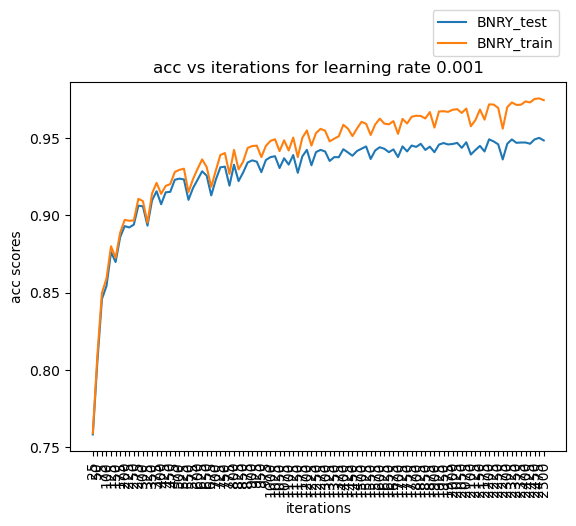

In [263]:
#ORIG DATASET LR 0.001 - Adam optimizer with 25 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('acc', learning_rate, iter_save)

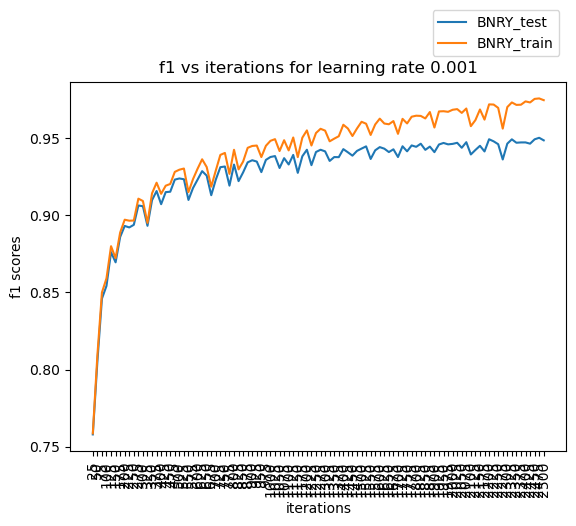

In [265]:
#ORIG DATASET LR 0.001 - Adam optimizer with 25 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('f1', learning_rate, iter_save)

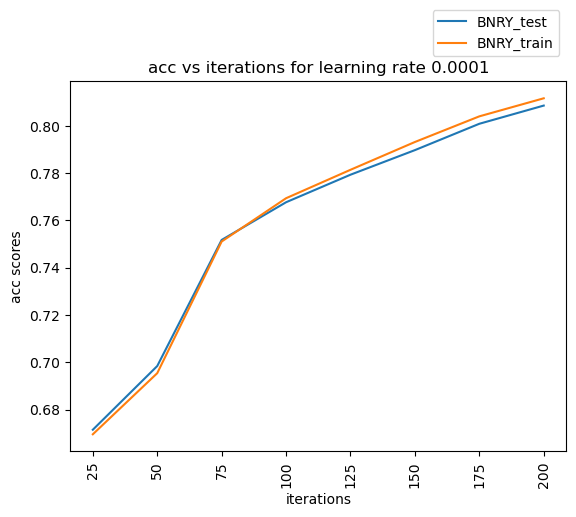

In [67]:
#ORIG DATASET LR 0.0001 - Adam optimizer with 2 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('acc', learning_rate, iter_save)

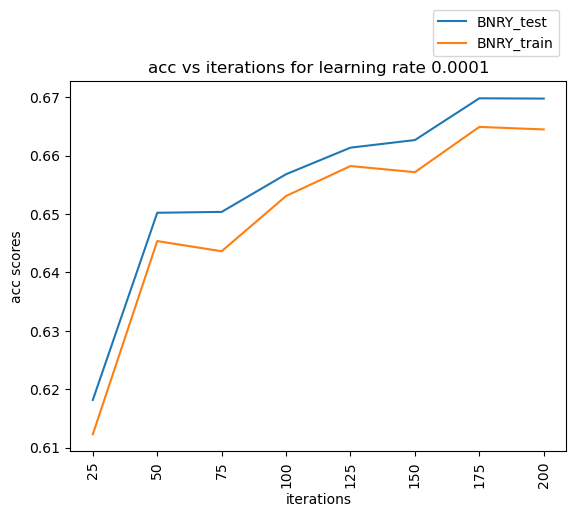

In [63]:
#LR 0.0001 - adagrad optimizer with 2 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('acc', learning_rate, iter_save)

In [267]:
##Save the binary model with original data
torch.save(model, "model/BNRY_deepNN_origData.pth")

In [ ]:
#Load the saved binary model on orig data
#model = torch.load("model/BNRY_deepNN_origData.pth", weights_only=False)
#model.eval()

In [9]:
#pytorch configs
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 25 #50 #how many of training cycles to run?
batch_size = 1000 #how many records at one time?
learning_rate = 0.001 # how fast can you learn? size of the learning step? 0.01 was the best last time
iter_save = 25 #100

# lambda function
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    #transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [249]:
#orig = cv2.imread("data/archive/train/1/0000 (2).jpg")
#print(orig.shape)
#orig

In [251]:
#mod = create_ela(cv2.imread("data/archive/train/1/0000 (2).jpg"))
#print(mod.shape)
#mod

In [ ]:
#convert files into ELA
#convert_files("data/archive/train/0", "data/archive2/train/0")
#convert_files("data/archive/train/1", "data/archive2/train/1")
#convert_files("data/archive/test/0", "data/archive2/test/0")
#convert_files("data/archive/test/1", "data/archive2/test/1")

In [13]:
ELA_train_dataset = torchvision.datasets.ImageFolder(root='./data/archive2/train', transform=transform)
ELA_test_dataset = torchvision.datasets.ImageFolder(root='./data/archive2/test', transform=transform)

ELA_train_loader = torch.utils.data.DataLoader(dataset=ELA_train_dataset, batch_size=batch_size, shuffle=True)
ELA_test_loader = torch.utils.data.DataLoader(dataset=ELA_test_dataset, batch_size=batch_size, shuffle=True)

# define global map of loader_name to data loaders
loader_map = {
    "ELA_test": ELA_test_loader,
    "ELA_train": ELA_train_loader
}

In [15]:
# Select the model
#model = SimpleCNN().to(device)
model = DeepCNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

results = train_model(model, ELA_train_loader)

Epoch [1/25], Step [25/100], Loss: 0.6899
Epoch [1/25], Step [50/100], Loss: 0.6436
Epoch [1/25], Step [75/100], Loss: 0.6081
Epoch [1/25], Step [100/100], Loss: 0.5683
Epoch [2/25], Step [25/100], Loss: 0.5562
Epoch [2/25], Step [50/100], Loss: 0.5507
Epoch [2/25], Step [75/100], Loss: 0.5376
Epoch [2/25], Step [100/100], Loss: 0.5309
Epoch [3/25], Step [25/100], Loss: 0.5315
Epoch [3/25], Step [50/100], Loss: 0.5299
Epoch [3/25], Step [75/100], Loss: 0.5275
Epoch [3/25], Step [100/100], Loss: 0.5222
Epoch [4/25], Step [25/100], Loss: 0.5244
Epoch [4/25], Step [50/100], Loss: 0.5178
Epoch [4/25], Step [75/100], Loss: 0.5171
Epoch [4/25], Step [100/100], Loss: 0.5228
Epoch [5/25], Step [25/100], Loss: 0.5216
Epoch [5/25], Step [50/100], Loss: 0.5141
Epoch [5/25], Step [75/100], Loss: 0.5117
Epoch [5/25], Step [100/100], Loss: 0.5118
Epoch [6/25], Step [25/100], Loss: 0.5141
Epoch [6/25], Step [50/100], Loss: 0.5144
Epoch [6/25], Step [75/100], Loss: 0.5134
Epoch [6/25], Step [100/100],

In [16]:
##Save the binary model with original data
torch.save(model, "model/BNRY_deepNN_elaData.pth")

In [ ]:
#Load the saved binary model on orig data
#model = torch.load("model/BNRY_deepNN_origData.pth", weights_only=False)
#model.eval()

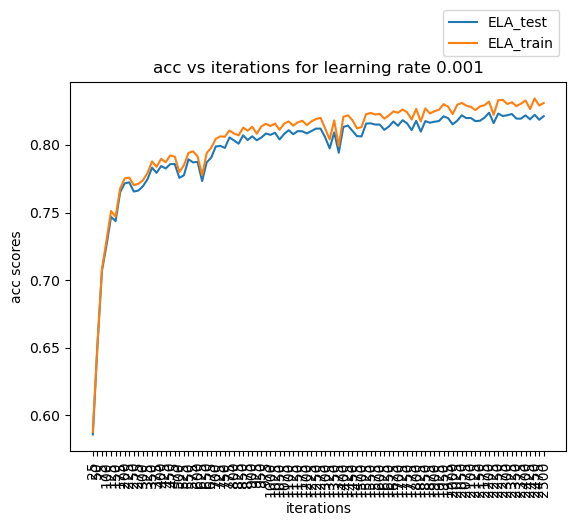

In [19]:
#ELA DATASET LR 0.001 - Adam optimizer with 25 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('acc', learning_rate, iter_save)

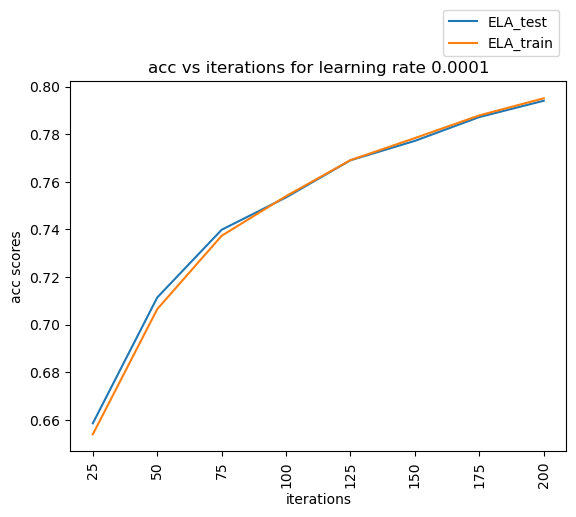

In [245]:
#ELA DATASET LR 0.0001 - Adam optimizer with 2 epochs, 1000 batch, and RELU, 2 classes
plotPerformance('acc', learning_rate, iter_save)

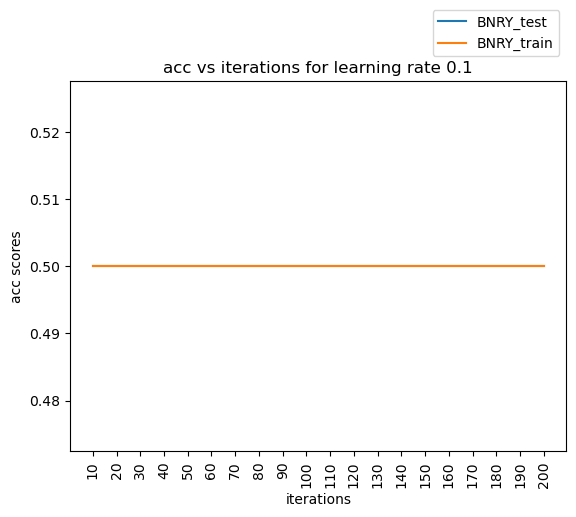

In [19]:
#LR 0.01 - adagrad optimizer with 2 epochs, 1000 batch, and PRELU, 10 classes
#DID NOT LEARN AT ALL
plotPerformance('acc', learning_rate, iter_save)